In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.__version__
#텐서플로우 버전은 2.2.0을 사용합니다

'2.2.0'

In [ ]:
keras.__version__
# 케라스 버전은 2.3.0버전을 이용합니다.

'2.3.0-tf'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
# 신경망 구현을 위해 데이터셋을 가져옵니다.
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# 훈련데이터와 테스트 데이터를 가져옵니다.

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape
# 데이터의 특징을 보니 60000개가 있으며 28*28형태의 이미지인것을 알 수 있습니다.

(60000, 28, 28)

In [ ]:
X_train_full.dtype
# 데이터 타입을 파악합니다. 정수형이라는 것을 알 수 있습니다.

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test / 255.0
# 훈련데이터 중 Valid 데이터를 판단합니다. 이 데이터는 학습과정에서 잘 학습했는지 파악합니다.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# 데이터 라벨을 파악합니다. 

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
#make model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#모델을 만들어봅니다. 케라스에서 models.Sequential을 선언합니다. 
# Sequential 객체를 통해서 선언합니다.
# add 함수를 통해서 층을 쌓습니다.
# keras.layers.Flatten() => 현재 데이터는 28*28 이미지이기 때문에 1차원으로 평평하게 층을 만듭니다.
# keras.layers.Dense() => 층을 쌓되 개수를 30개로 하고 활성화 함수를 통해 연결합니다.
# 마지막에 10개로 한 이유는 class값이 10개이기 때문입니다. 

In [ ]:
model.summary()
#summary 함수를 통해서 모델이 어떻게 되어있는지 볼 수 있습니다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

# 각각의 가중치를 알 수 있습니다.

array([[ 0.0214078 , -0.05323971,  0.01671617, ...,  0.02849425,
         0.06062986, -0.01958018],
       [ 0.04908957,  0.07139544, -0.06023509, ...,  0.03314953,
         0.04798176, -0.07396426],
       [ 0.00726209,  0.04231388,  0.03852595, ...,  0.01626602,
         0.06533605,  0.01047802],
       ...,
       [-0.00273291, -0.03578931, -0.0378008 , ...,  0.03389761,
         0.03271341, -0.01180291],
       [-0.01715135,  0.0116556 ,  0.05854   , ..., -0.07259545,
         0.04738913, -0.03933   ],
       [ 0.03744747, -0.06096649, -0.05977854, ...,  0.03048259,
         0.02913439,  0.05318908]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# 모델을 선언하였으면 컴파일 함수를 통해서 손실함수와 최적화 과정을 선언합니다.
# 손실함수는 분류문제이기 때문에 크로스엔트로피 함수와 최적화는 경사하강법을 통해서 모델을 설정합니다.

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid,y_valid))
#학습을 시작합니다. fit함수를 통해서 훈련을 시작합니다.

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7205 - accuracy: 0.7639 - val_loss: 0.5170 - val_accuracy: 0.8256
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4893 - accuracy: 0.8290 - val_loss: 0.4567 - val_accuracy: 0.8422
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4430 - accuracy: 0.8448 - val_loss: 0.4178 - val_accuracy: 0.8586
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4157 - accuracy: 0.8524 - val_loss: 0.4091 - val_accuracy: 0.8610
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3956 - accuracy: 0.8609 - val_loss: 0.3880 - val_accuracy: 0.8666
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8654 - val_loss: 0.3743 - val_accuracy: 0.8686
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8702 - val_loss: 0.3613 - val_accuracy:

(0.0, 1.0)

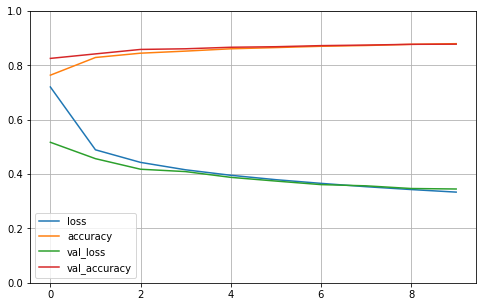

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#데이터 정확성을 시각화합니다.

In [ ]:
model.evaluate(X_test, y_test)
# 평가를 시작합니다 정확성이 86퍼나 됩니다!!!!!

313/313 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8628


[0.3818608820438385, 0.8628000020980835]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
#데이터를 이제 맞나 확인해보도록 하겠습니다

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.09, 0.01, 0.85],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred
# 학습된 모델을 통해서 새로운 데이터의 값을 예측합니다.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [ ]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
#perceptron

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(data.data, data.target)
X_train, X_valid , y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# 퍼셉트론 구현
# 캘리포니아 데이터 가져오기
# 데이터를 정규화 과정 거치기

In [ ]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
])
# 신경망 은닉층은 30이고 하나의 값을 도출 

In [ ]:
model.compile(loss ="mean_squared_error", optimizer='sgd')

# 모델을 컴파일을 한다 손실함수는 평균제곱오차 최적화 함수는 sgd라는 것을 이용 

In [ ]:
history = model.fit(X_train,y_train, epochs=35, validation_data=(X_valid,y_valid))
# 모델 학습 시작

Epoch 1/35
363/363 [==============================] - 1s 2ms/step - loss: 1.3867 - val_loss: 0.6406
Epoch 2/35
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - val_loss: 0.4556
Epoch 3/35
363/363 [==============================] - 1s 1ms/step - loss: 0.4629 - val_loss: 0.3979
Epoch 4/35
363/363 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.3853
Epoch 5/35
363/363 [==============================] - 1s 1ms/step - loss: 0.4233 - val_loss: 0.3749
Epoch 6/35
363/363 [==============================] - 1s 1ms/step - loss: 0.4137 - val_loss: 0.3682
Epoch 7/35
363/363 [==============================] - 1s 1ms/step - loss: 0.4067 - val_loss: 0.3644
Epoch 8/35
363/363 [==============================] - 1s 1ms/step - loss: 0.4010 - val_loss: 0.3576
Epoch 9/35
363/363 [==============================] - 1s 1ms/step - loss: 0.3971 - val_loss: 0.3567
Epoch 10/35
363/363 [==============================] - 1s 2ms/step - loss: 0.3928 - val_loss: 0.3521

In [ ]:
mse_test = model.evaluate(X_test, y_test)
#평가 

162/162 [==============================] - 0s 1ms/step - loss: 0.3482


In [ ]:
X_new = X_test[:3]
print(y_test[:3])
y_pred = model.predict(X_new)
y_pred

#모델 예측하여 값 도출 

[3.385 1.266 0.531]


array([[3.8644638 ],
       [1.512855  ],
       [0.52250576]], dtype=float32)

In [ ]:
#Complex model

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

# 복합모델 구현
# 입력층은 X의 크기 은닉층 2개는 30개의 뉴런으로 이루어진 층, 합치는 과정에서 인력과 hidden을 쳐서
# 하나의 결과값을 도출한다. 

In [ ]:
model.summary()

#모델 요약 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

# 모델을 학습한다.

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7776 - val_loss: 0.5965
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6387 - val_loss: 0.5523
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6027 - val_loss: 0.5279
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5791 - val_loss: 0.5062
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5625 - val_loss: 0.4951
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5487 - val_loss: 0.4871
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5374 - val_loss: 0.4769
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5287 - val_loss: 0.4694
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5211 - val_loss: 0.4630
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5144 - val_loss: 0.4580

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

# 입력층 2개를 설정하여 B에 은닉층 2개를 연결하고 A와 B에 연결된 은닉층과 연결 하나의 값으로 출력한다.


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9480 - val_loss: 1.2349
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8127 - val_loss: 0.6944
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6954 - val_loss: 0.6171
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6481 - val_loss: 0.5734
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6165 - val_loss: 0.5435
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5921 - val_loss: 0.5196
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5732 - val_loss: 0.5027
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5574 - val_loss: 0.4898
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5448 - val_loss: 0.4784
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5337 - val_loss: 0.4701

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

# 입력층은 A,B로 하고 B에 연결하여 은닉층을 연결한다. 결과값은 2개이다. 하나는 은닉층을 연결한 값만 나머지는
# 은닉층과 A를 합친 값을 출력한다.

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

#출력값이 2개이기 때문에 손실도 2개로 해야한다.

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

# 모델 학습 시작

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2457 - main_output_loss: 1.9175 - aux_output_loss: 5.1988 - val_loss: 1.1649 - val_main_output_loss: 0.8598 - val_aux_output_loss: 3.9107
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0031 - main_output_loss: 0.7465 - aux_output_loss: 3.3124 - val_loss: 0.8273 - val_main_output_loss: 0.6387 - val_aux_output_loss: 2.5245
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8180 - main_output_loss: 0.6572 - aux_output_loss: 2.2658 - val_loss: 0.7026 - val_main_output_loss: 0.5826 - val_aux_output_loss: 1.7831
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7294 - main_output_loss: 0.6205 - aux_output_loss: 1.7096 - val_loss: 0.6376 - val_main_output_loss: 0.5535 - val_aux_output_loss: 1.3946
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6775 - main_output_loss: 0.5951 - aux_output_loss: 1.4198 - val_loss

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.5144 - main_output_loss: 0.4724 - aux_output_loss: 0.8926


In [ ]:
y_pred_main

array([[3.268152 ],
       [1.7551172],
       [0.4096024]], dtype=float32)

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

# 클래스형 선언 모델한다. 

In [ ]:

model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.7740 - output_1_loss: 2.4008 - output_2_loss: 6.1326 - val_loss: 1.3484 - val_output_1_loss: 0.9234 - val_output_2_loss: 5.1733
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.2079 - output_1_loss: 0.8464 - output_2_loss: 4.4617 - val_loss: 0.9797 - val_output_1_loss: 0.7008 - val_output_2_loss: 3.4900
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9555 - output_1_loss: 0.7151 - output_2_loss: 3.1192 - val_loss: 0.8120 - val_output_1_loss: 0.6265 - val_output_2_loss: 2.4815
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8241 - output_1_loss: 0.6589 - output_2_loss: 2.3109 - val_loss: 0.7175 - val_output_1_loss: 0.5847 - val_output_2_loss: 1.9127
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7439 - output_1_loss: 0.6216 - output_2_loss: 1.8450 - val_loss: 0.6554 - val_output_1_loss: 0.5522 - val_ou

In [ ]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  210       
_________________________________________________________________
dense_13 (Dense)             multiple                  930       
_________________________________________________________________
dense_14 (Dense)             multiple                  36        
_________________________________________________________________
dense_15 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________
